# Clustering - Mini-Project 3

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# Data Inspection

In [3]:
#Taking a look at the genres
list(df['genres'].unique())

['21st century classical',
 '432hz',
 '8-bit',
 '[]',
 'a cappella',
 'abstract',
 'abstract beats',
 'abstract hip hop',
 'accordeon',
 'accordion',
 'acid house',
 'acid rock',
 'acid trance',
 'acousmatic',
 'acoustic blues',
 'acoustic pop',
 'acoustic punk',
 'acoustic rock',
 'action rock',
 'adoracion',
 'adult standards',
 'adventista',
 'afghan pop',
 'afghan traditional',
 'african percussion',
 'african reggae',
 'african rock',
 'african-american classical',
 'afro dancehall',
 'afro house',
 'afro psych',
 'afro soul',
 'afro-funk',
 'afrobeat',
 'afrofuturism',
 'afrofuturismo brasileiro',
 'afropop',
 'afroswing',
 'aggrotech',
 'alabama indie',
 'alabama metal',
 'alabama rap',
 'alaska indie',
 'albanian pop',
 'albany ny indie',
 'alberta country',
 'alberta hip hop',
 'album rock',
 'albuquerque indie',
 'alt-idol',
 'alte',
 'alternative americana',
 'alternative country',
 'alternative dance',
 'alternative emo',
 'alternative hip hop',
 'alternative metal',
 'alte

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# Data Cleaning

In [5]:
#We droppeed the fourth row because it had no genre which wont be useful for our model
df.drop([3], inplace = True )
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


# Exploratory Data Analysis

## Q1: What are the 5 most popular music genres?

In [6]:
largest_pop=df.nlargest(5, 'popularity')
largest_pop

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.847,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.698,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.885,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11


## Visualization :

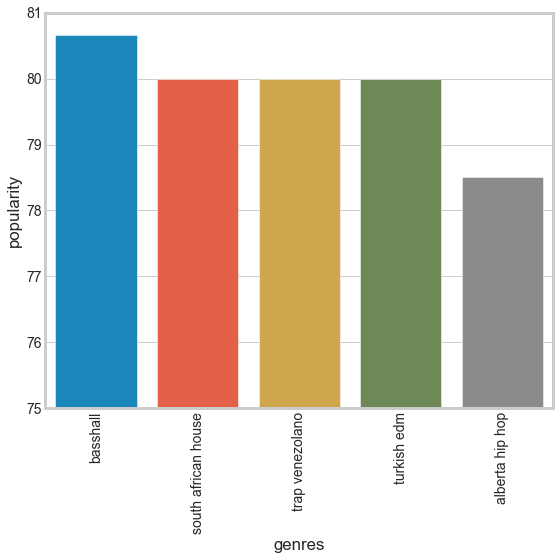

In [7]:
#Plotting data using barplot to find out 5 most popular genres
plt.figure(figsize=(8,8))
sns.barplot(data=largest_pop,x='genres',y='popularity')
plt.xticks(rotation=90)
plt.ylim(75,81)
plt.tight_layout()


### 5 most popular genres are :1-Basshall (80.6%)  2-SouthAfrican House(80.0%)  3-Trap Venezolano (80.0%)  4-Turkish edm (80.0%)  5-Alberta Hip-Hop (78.5%)

# Q2: What factors affect the Popularity of the song ?

In [8]:
pop_corr= df.corrwith(df['popularity'])
pop_corr.sort_values(key=abs,ascending=False)

popularity          1.000000
acousticness       -0.458546
loudness            0.344315
energy              0.337657
instrumentalness   -0.265516
danceability        0.218019
tempo               0.146617
liveness           -0.094092
duration_ms        -0.071111
speechiness        -0.045112
mode               -0.031067
valence             0.023117
key                 0.008700
dtype: float64

# Visualization :

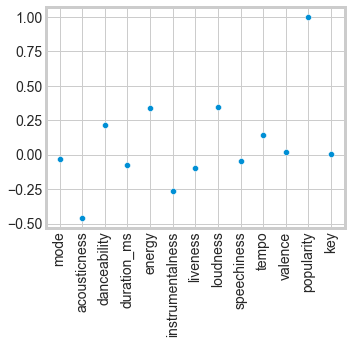

In [9]:
plt.figure(figsize=(5,5))
pop_corr= df.corrwith(df['popularity'])
sns.scatterplot(data=pop_corr)
plt.xticks(rotation=90)
plt.tight_layout()

<AxesSubplot:>

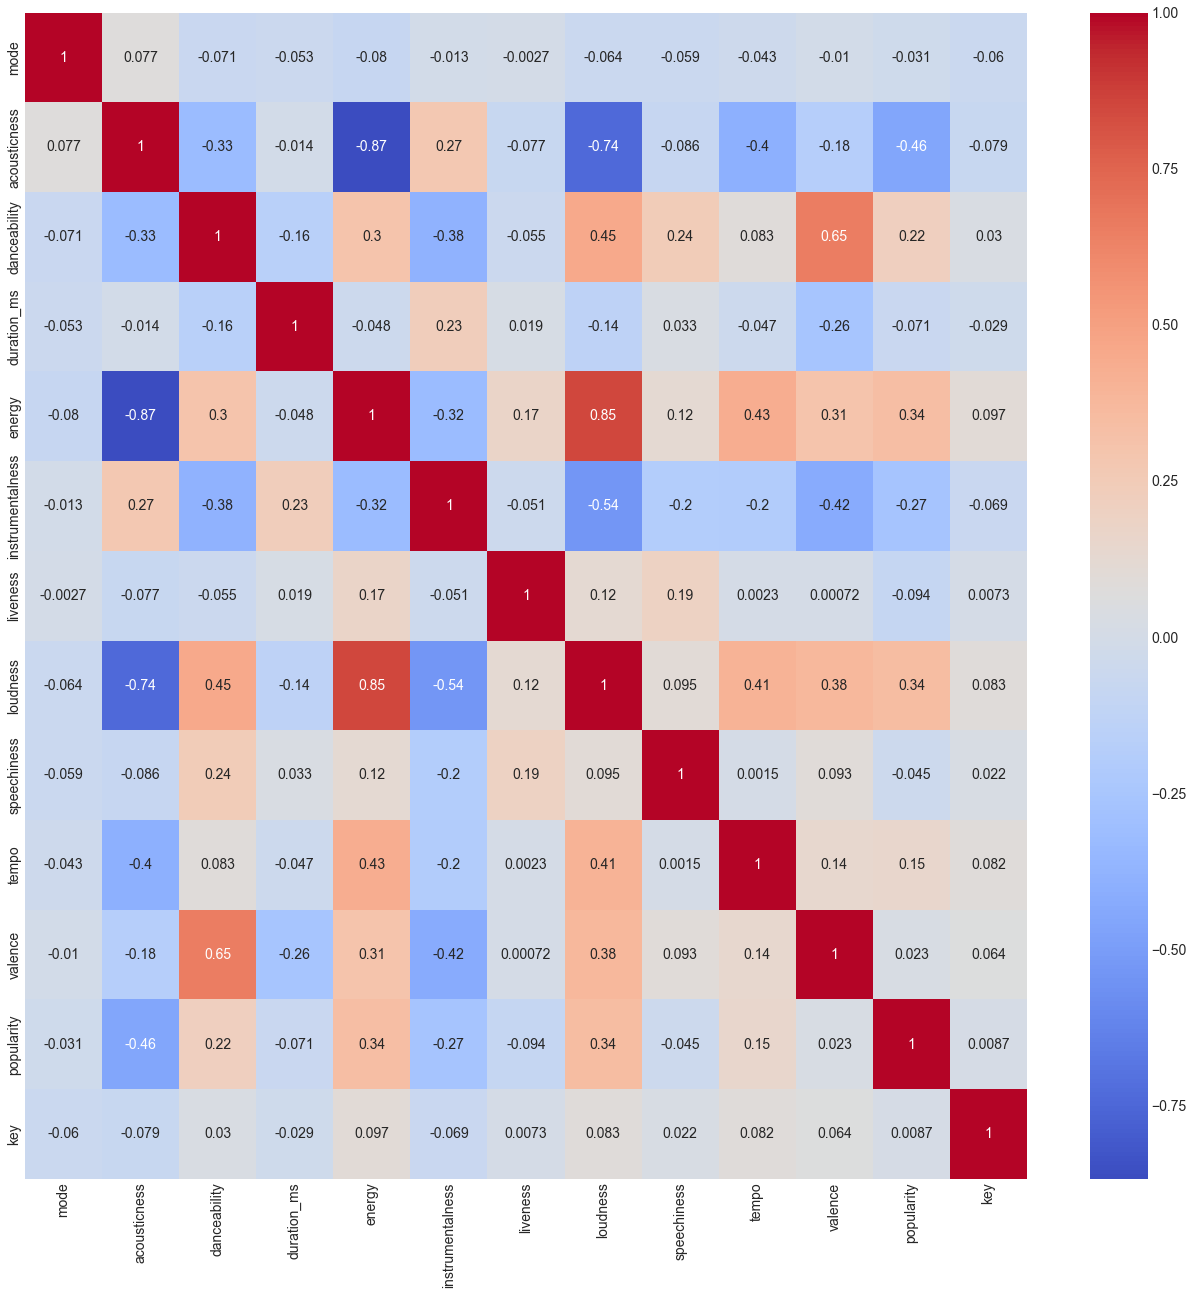

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True, cmap='coolwarm')

### The two biggest factors that affects the popularity of a song are 1-acousticness strong negative correlation of -0.46 with popularity 2-loudness and energy both have a strong postive correlation of 0.34 with popularity

## Q3: Which genre has the highest energy and which has the lowest?

In [11]:
#Obtaining genres with highest energy
highest_energy=df.nlargest(5,'energy')
highest_energy

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
175,0,australian ska,0.000096,0.312667,211724.666667,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.228900,43.333333,9
2706,1,tennessee metal,0.000891,0.372000,264013.333333,0.994333,0.040620,0.1780,-4.621,0.192667,122.180,0.105967,46.000000,11
1897,0,nederlandse hardstyle,0.076200,0.341000,237818.000000,0.994000,0.000000,0.3520,0.060,0.374000,157.607,0.220000,0.000000,1
348,0,brazilian ska,0.500000,0.320000,172176.000000,0.991000,0.000004,0.2260,-7.047,0.220000,167.532,0.545000,13.000000,9
913,1,dutch death metal,0.000040,0.306000,279093.000000,0.989000,0.000410,0.2700,-5.087,0.109000,103.006,0.134000,38.000000,2


In [12]:
#Obtaining genres with lowest energy
lowest_energy=df.nsmallest(5,'energy')
lowest_energy

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
283,1,binaural,0.9935,0.4395,122174.5,0.001002,0.8025,0.1090,-41.8250,0.07950,68.144,0.1841,59.0,3
328,1,brain waves,0.9935,0.4395,122174.5,0.001002,0.8025,0.1090,-41.8250,0.07950,68.144,0.1841,59.0,3
1611,1,korean classical piano,0.9935,0.3795,135913.5,0.003950,0.9465,0.0986,-37.6195,0.05245,68.906,0.3495,49.0,8
2476,1,singing bowl,0.9160,0.0569,554747.0,0.004130,0.9710,0.1200,-30.6840,0.05750,56.436,0.0245,45.0,3
1723,1,medieval,0.9950,0.5330,136072.0,0.004440,0.7960,0.1110,-29.4720,0.06040,80.919,0.1760,0.0,8


## Visualization:

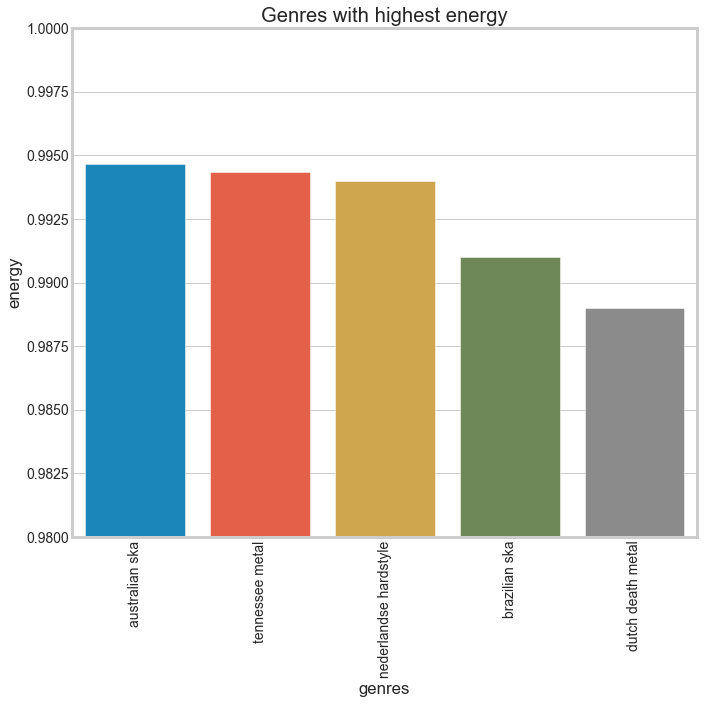

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(data=highest_energy,x='genres',y='energy').set(title='Genres with highest energy')
plt.xticks(rotation=90)
plt.ylim(0.98,1)
plt.tight_layout()

###  So the genre with the highest energy is Australian ska (0.9947)

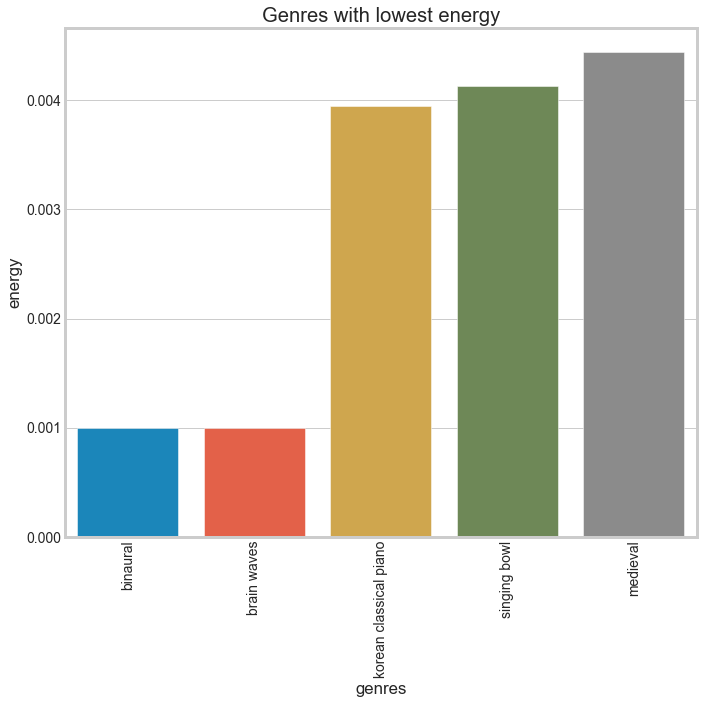

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(data=lowest_energy,x='genres',y='energy').set(title='Genres with lowest energy')
plt.xticks(rotation=90)
plt.tight_layout()

### And the genre with the lowest energy are binaural and brain waves both at (0.001)

## Q4: What are the most correlated pairs of attributes ?

In [15]:
corr=df.corr()
corr

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,0.077240,-0.071234,-0.053170,-0.080268,-0.012659,-0.002692,-0.063660,-0.059175,-0.042880,-0.010274,-0.031067,-0.060159
acousticness,0.077240,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.071234,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration_ms,-0.053170,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.080268,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,-0.012659,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.002692,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness,-0.063660,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.059175,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294
tempo,-0.042880,-0.397669,0.082864,-0.046865,0.430789,-0.201670,0.002318,0.407962,0.001482,1.000000,0.139605,0.146617,0.081648


## Visualization :

<AxesSubplot:>

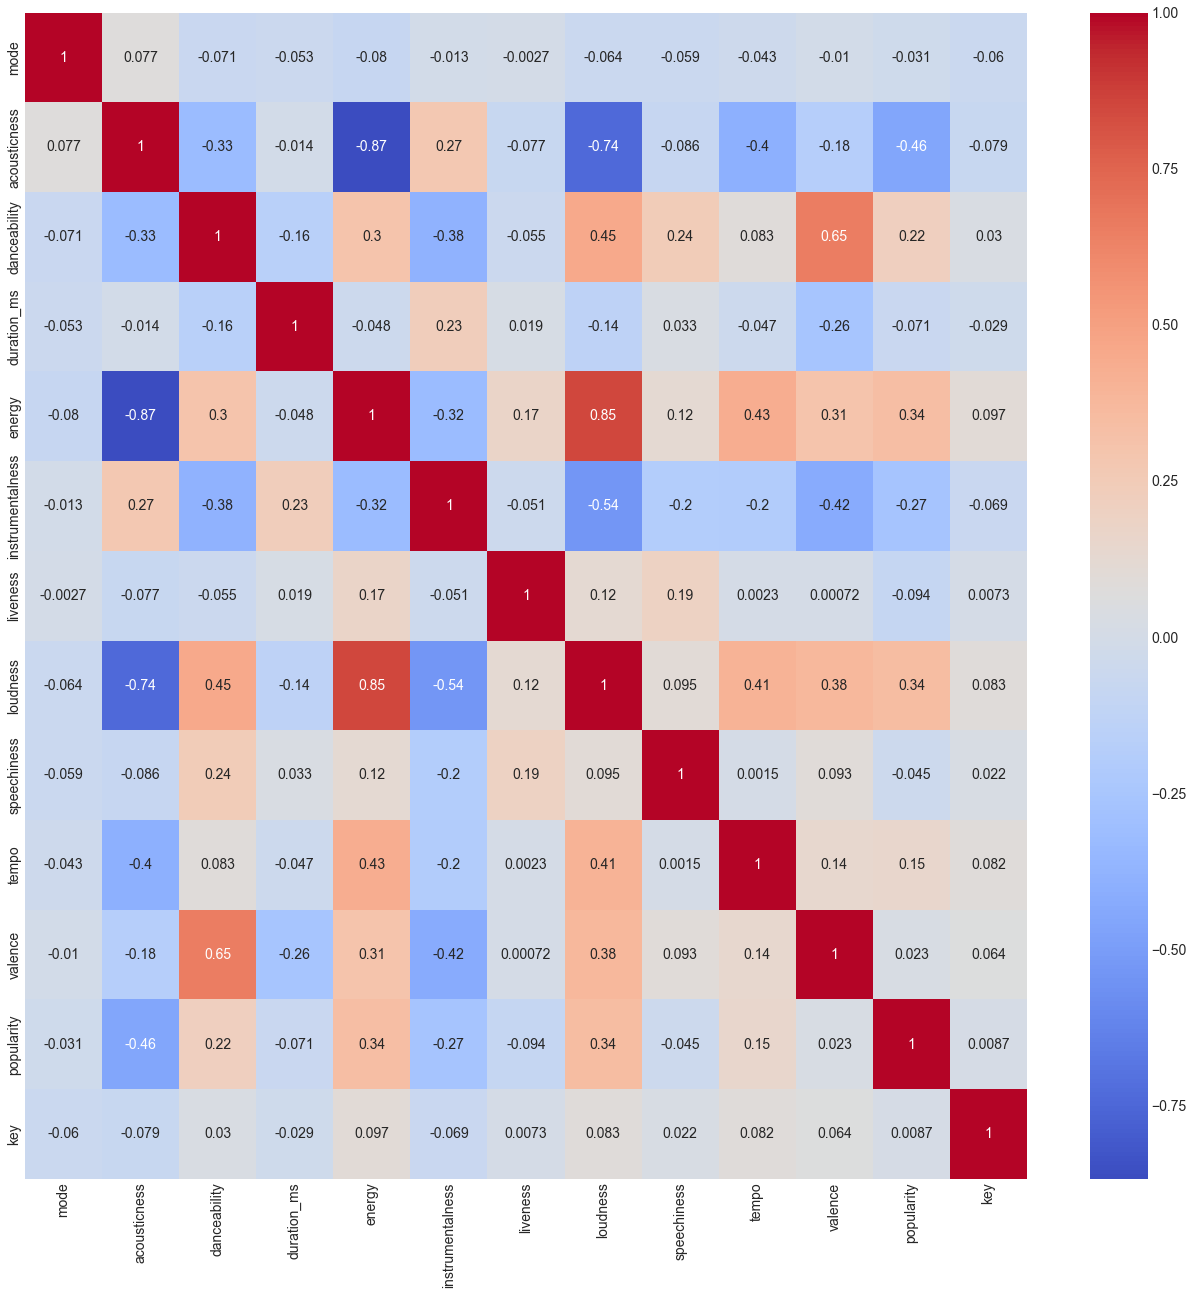

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,cmap='coolwarm',annot=True)

### The two most correlated attributes in the dataframe are : 1- (Energy,acousticness) with a strong negative correlation of -0.87  2- (loudness,energy) with a strong positive correlation of 0.85

# Data Preparation for modelling

In [17]:
df_copy =df.copy()
df_copy

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [18]:
#Dropping genres column due to all its values being unique, but it will be dropped in a new dataframe and will be kept in the original one so we can identify where each record belongs to after clustering 
df_copy= df_copy.drop('genres',axis=1)
df_copy

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [19]:
#Normalizing our dataset, to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms
from sklearn.preprocessing import StandardScaler 
df_copy = StandardScaler().fit_transform(df_copy)
df_copy

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

# Modeling

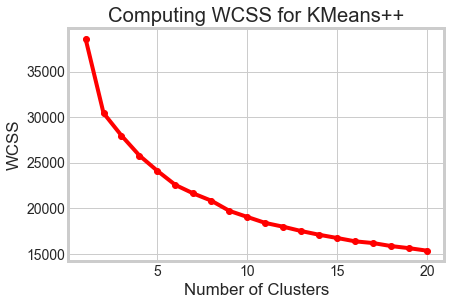

In [20]:
#Computing the sum of squared distance between each point and the centroid in a cluster.That will help us in deciding the optimum amount of clusters
from sklearn.cluster import KMeans
wcss = []
for k in range( 1, 21 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(df_copy)
    wcss.append( kmeans.inertia_ )    
plt.plot(range(1, 21), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

###  After observing the graph and To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 10

In [21]:
#Now we will cluster all the genres into 10 clusters that was decided by using elbow method on the WCSS graph then after clustering we will create a new column in our original data frame to add the assigned cluster to each row 
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_copy)
df["cluster"] = cluster_labels
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,3
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,8
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,1
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,6
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1,3


# Exploring data after clustering

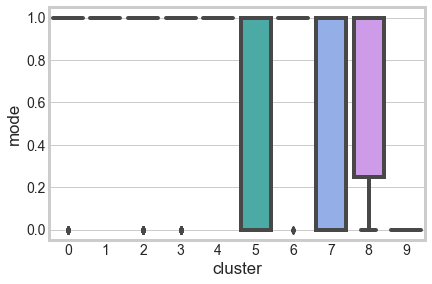

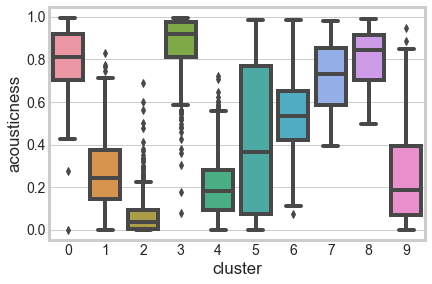

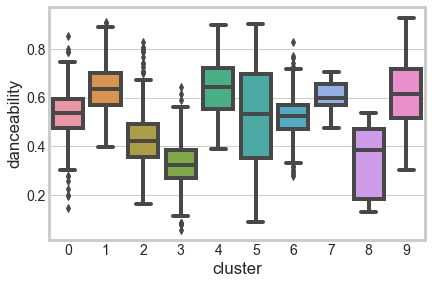

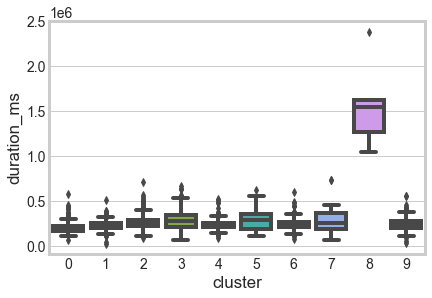

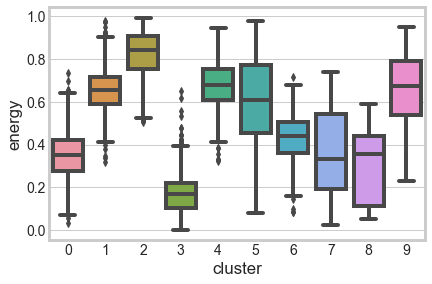

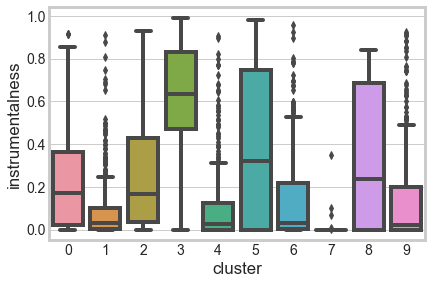

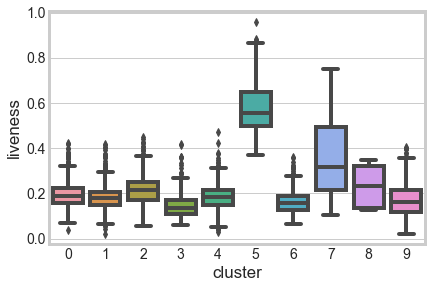

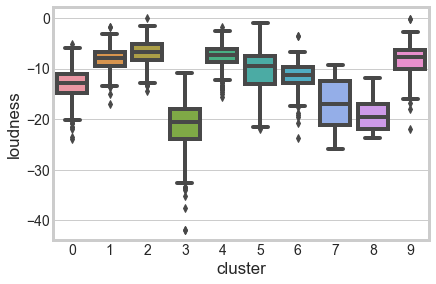

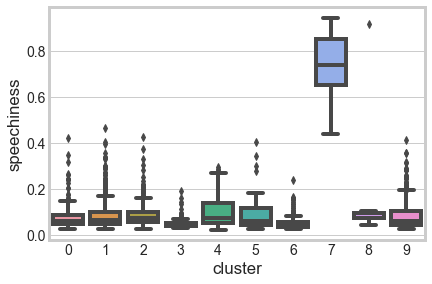

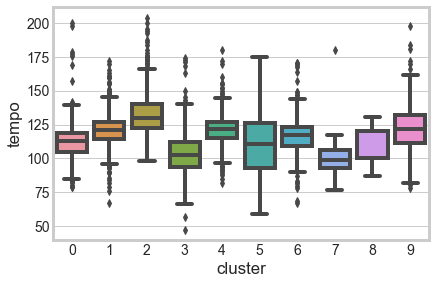

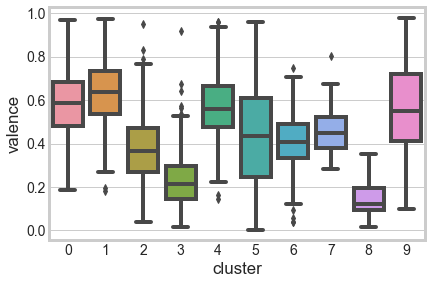

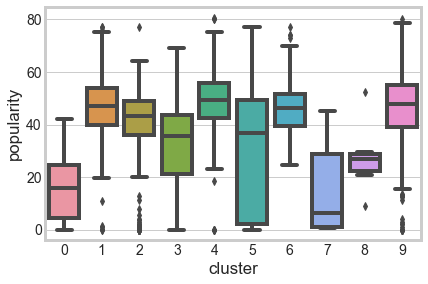

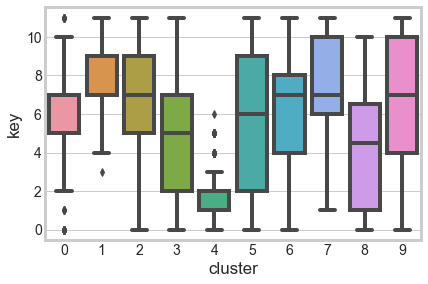

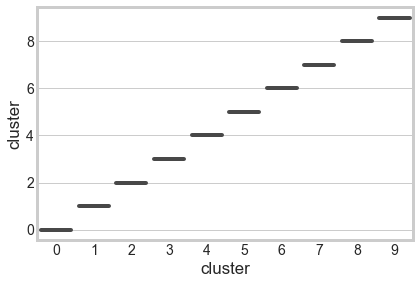

In [22]:
#Exploring more each cluster by box plotting every variable for each cluster
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)
    

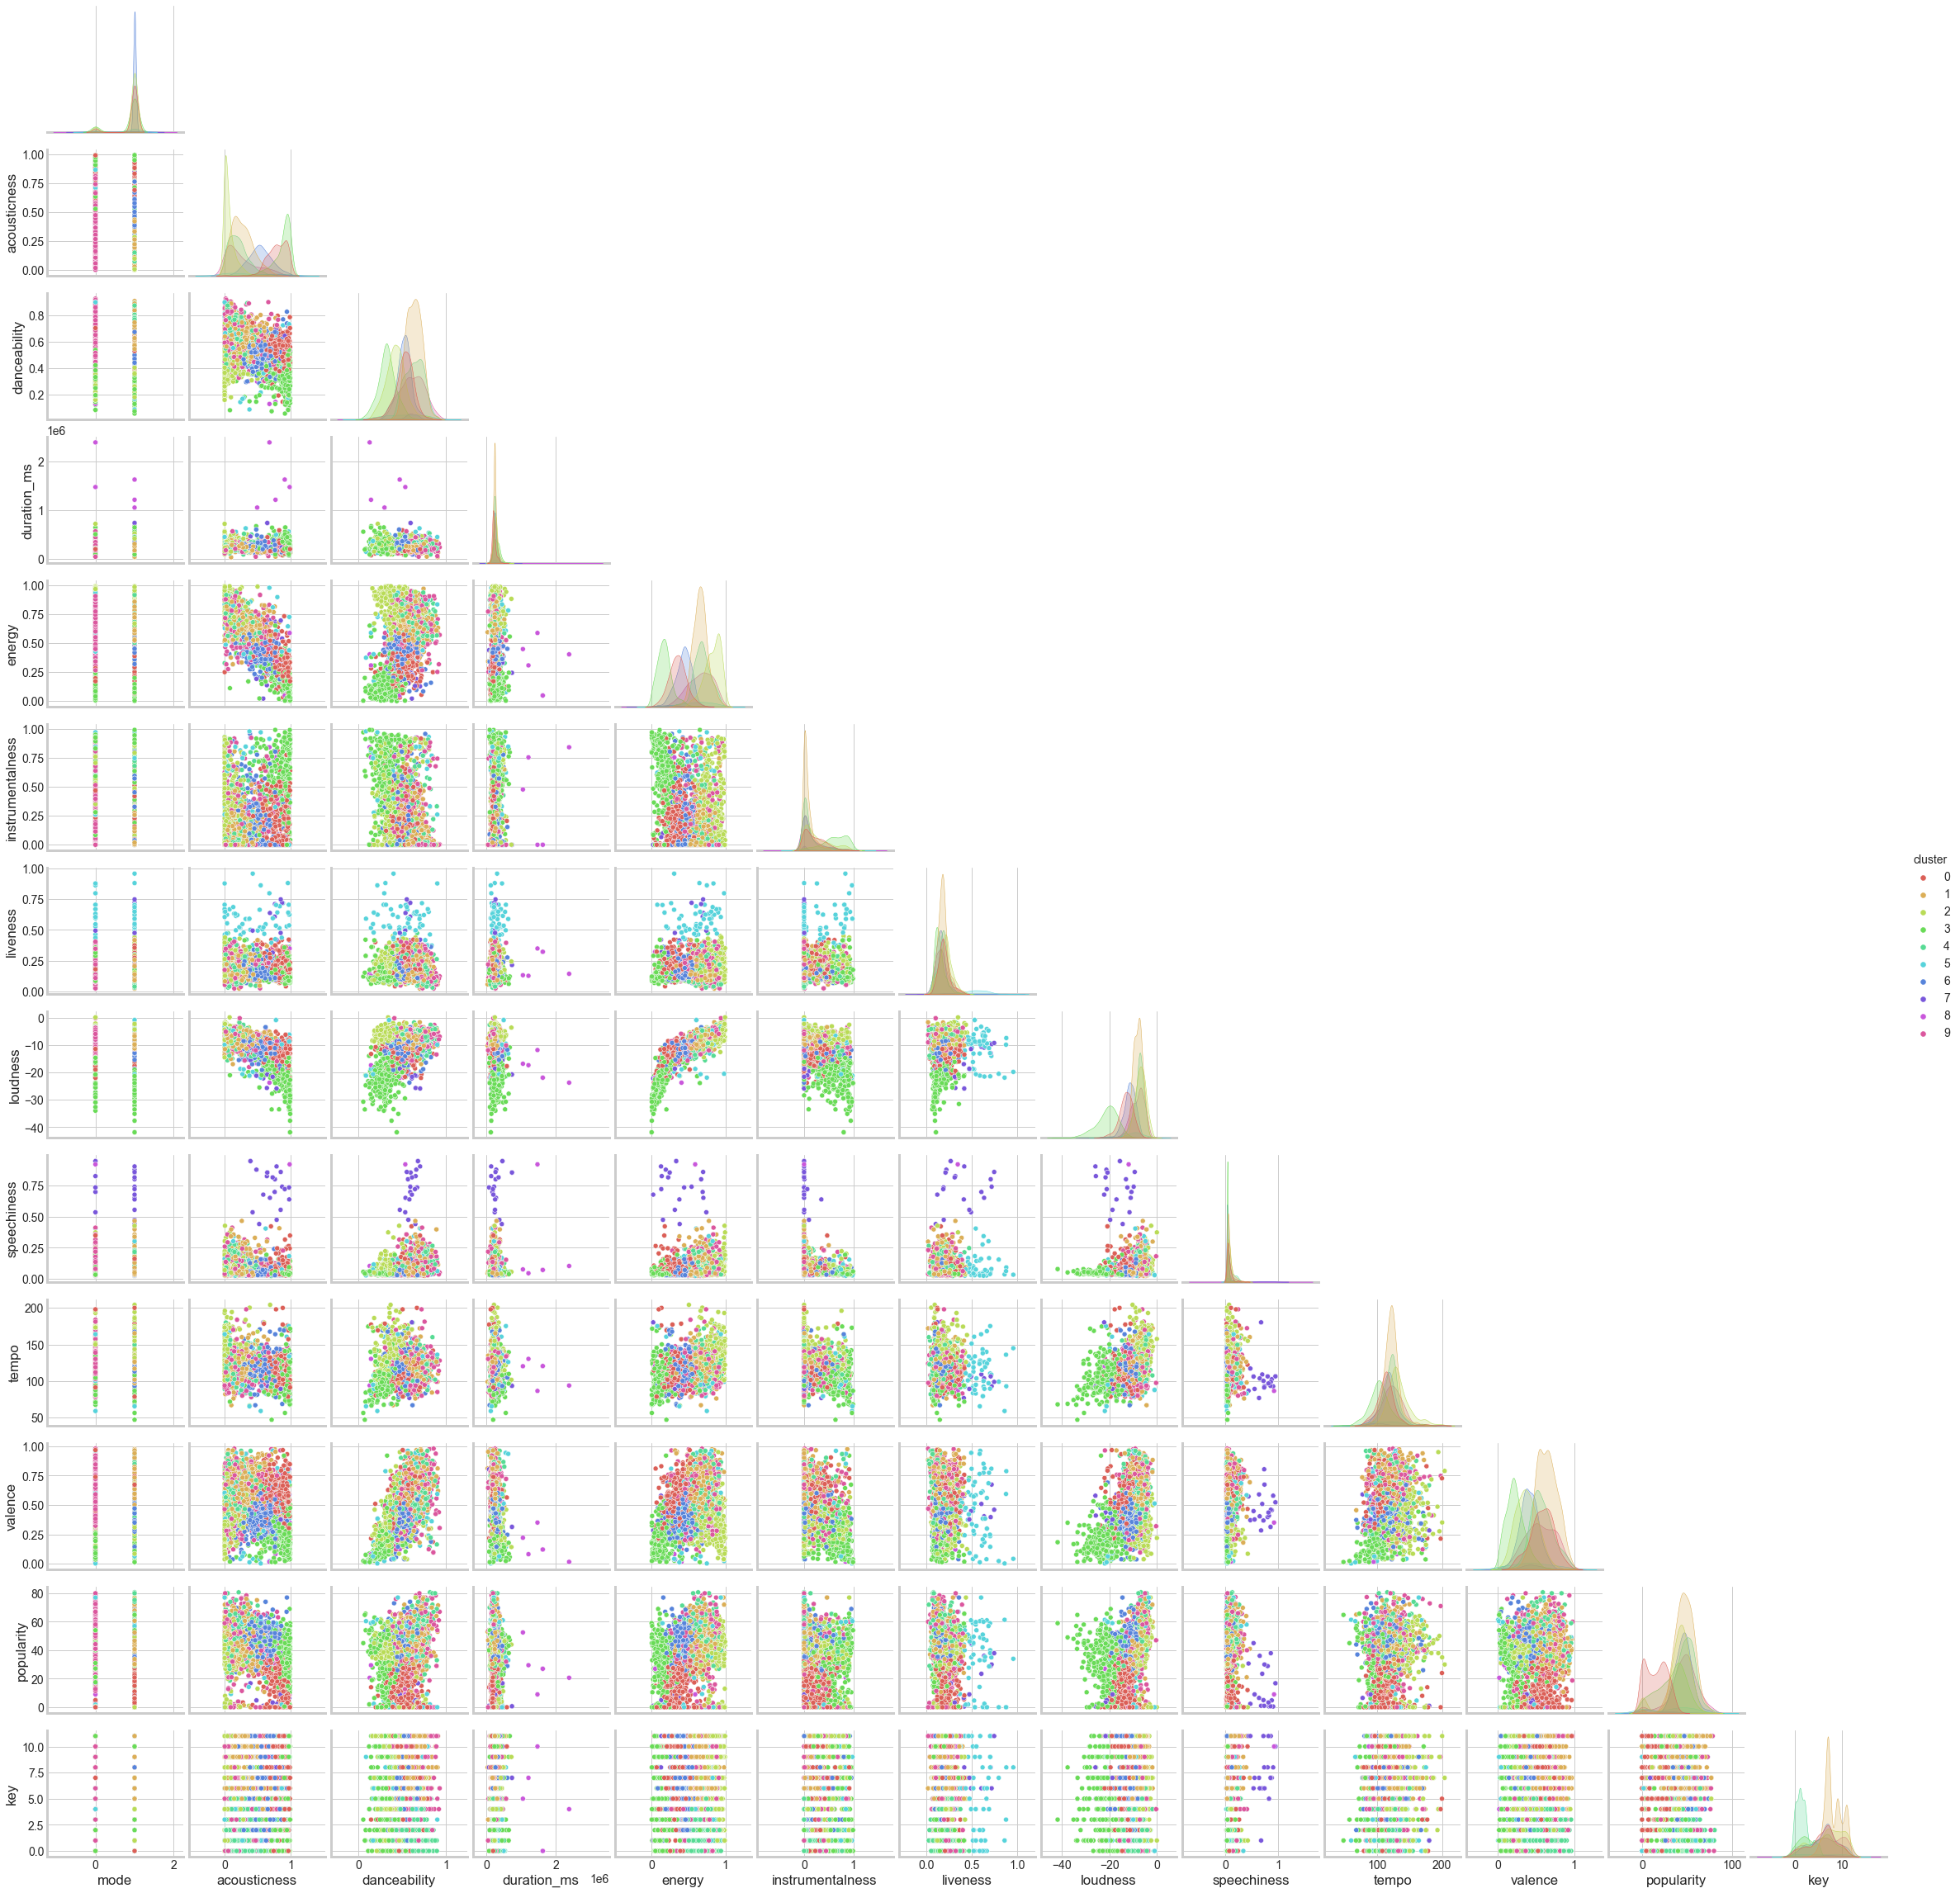

In [23]:
#Pair plotting every variable with one another showing how each cluster points behave in each graph
sns.pairplot(df, hue='cluster', palette=sns.color_palette('hls', 10), corner=True)

<AxesSubplot:xlabel='cluster', ylabel='count'>

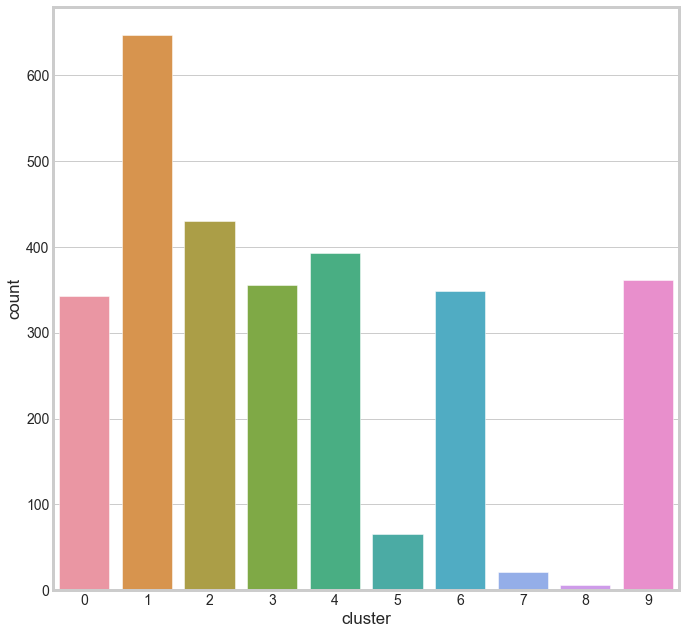

In [24]:
#Showing how many genres in each cluster
plt.figure(figsize=(10,10))
sns.countplot(x='cluster', data=df)

In [25]:
#5 random sample of genres from cluster 0 
df['genres'][df['cluster']==0].sample(5)

1224           greek jazz
2727            tollywood
1711               mantra
2277    quartetto d'archi
497              charanga
Name: genres, dtype: object

In [26]:
#5 random sample of genres from cluster 1
df['genres'][df['cluster']==1].sample(5)

2683    tamaulipas indie
2372          roots rock
1671    lo-fi brasileiro
510         chicago soul
316       boston hip hop
Name: genres, dtype: object

In [27]:
#5 random sample of genres from cluster 2
df['genres'][df['cluster']==2].sample(5)

751                          dangdut
2694           technical death metal
766                        danseband
60                  alternative rock
2243    progressive uplifting trance
Name: genres, dtype: object

In [28]:
#5 random sample of genres from cluster 3
df['genres'][df['cluster']==3].sample(5)

1324          hungarian classical piano
368      british contemporary classical
2068                              opera
72      american 21st century classical
2096                     outsider house
Name: genres, dtype: object

In [29]:
#5 random sample of genres from cluster 4
df['genres'][df['cluster']==4].sample(5)

2791                       ugandan pop
750                          dancehall
2700                       techno kayo
178     australian underground hip hop
865                            dfw rap
Name: genres, dtype: object

In [30]:
#5 random sample of genres from cluster 5 
df['genres'][df['cluster']==5].sample(5)

139     atmospheric post-metal
1829         mongolian hip hop
1009         experimental folk
982              environmental
1563              jig and reel
Name: genres, dtype: object

In [31]:
#5 random sample of genres from cluster 6
df['genres'][df['cluster']==6].sample(5)

1057                    folk
494                  chanson
460         canzone d'autore
884                downtempo
447     canadian psychedelic
Name: genres, dtype: object

In [32]:
#5 random sample of genres from cluster 7
df['genres'][df['cluster']==7].sample(5)

1836          motivation
518     children's story
911        dutch cabaret
290         black comedy
1931          new comedy
Name: genres, dtype: object

In [33]:
#5 random sample of genres from cluster 8 
df['genres'][df['cluster']==8].sample(5)

401     bulgarian experimental
1879      musique pour enfants
1775                microtonal
2074                   oratory
1                        432hz
Name: genres, dtype: object

In [34]:
#5 random sample of genres from cluster 9
df['genres'][df['cluster']==9].sample(5)

1522        japanese soundtrack
2653    swedish underground rap
1818              modern reggae
2166         polynesian hip hop
201                bahamian pop
Name: genres, dtype: object

## Some conclusions about the clusters that can be derived from observing the above visualizations

**Cluster 0** : low acousticness, High danceability, High energy, Very low on instrumentalness (Very Vocal songs), High valence indicates more cheerful songs in this cluster, high popularity

**Cluster 1** : low acousticness, High energy, Very high instrumentalness, low valence indicates more sad/angry songs in this cluster, low on popularity

**Cluster 2** : High acousticness, Medium energy, Very low on instrumentalness, High valence indicates more cheerful songs in this cluster, low on popularity

**Cluster 3** : Medium to low acousticness, High danceability, High energy, Very low on instrumentalness, High valence indicates more cheerful songs in this cluster, high popularity

**Cluster 4** : Very high acousticness, low danceability, Very low energy, high instrumentalness, low tempo, low valence indicates more sad/angry songs in this cluster

**Cluster 5** : low acousticness, Very high energy, low on instrumentalness, High tempo

**Cluster 6**: Medium acousticness, Medium energy, low on instrumentalness

**Cluster 7** : Mostly high acousticness, medium energy, Extremely low on instrumentalness (Extremely vocal songs), mostly tracks were performed live , Very lyrical due to high speechiness and most probably its a speech like recording (Audio book, Talk show etc), Low tempo,  low on popularity

**Cluster 8** : High acousticness, Long duration, Low energy, low valence indicates more sad/angry songs in this cluster

**Cluster 9** : Medium to low  acousticness, High danceability , High energy, High valence indicates more cheerful songs in this cluster, slightly high on popularity 



# Genre Recommendation

In [35]:
#We find out the cluster that this genre belongs to, and then the top 5 most popular genres from that cluster are returned as recommendation

def genre_recommendation(genre) : 
    
    genre_row=df[df['genres']==genre]
    cluster_no_of_genre= genre_row['cluster'].values[0]
    reccomended_df=df[df['cluster']==cluster_no_of_genre]
    reccomended_df= reccomended_df.nlargest(5,'popularity')
    print('Since you like ',genre,' you may also like: ')
    print(reccomended_df['genres'].to_string(index=False))

In [36]:
genre_recommendation('dutch death metal')

Since you like  dutch death metal  you may also like: 
      russian dance
indie rock mexicano
       emo mexicano
 punk rock mexicano
         j-division


In [37]:
genre_recommendation('egyptian pop')

Since you like  egyptian pop  you may also like: 
       turkish edm
   alberta hip hop
chinese electropop
         afroswing
         afro soul
